In [1]:
h = .001
k = 1
x₀ = 1
x(t) = (1+h*k)^(t/h) * x₀

x (generic function with 1 method)

In [4]:
x(1)

2.7169239322355936

In [5]:
h = 0.0001
x(1)

2.7181459268249255

In [3]:
ℯ

ℯ = 2.7182818284590...

In [6]:
x2(t) = x₀ / (1-h*k)^(t/h)

x2 (generic function with 1 method)

In [7]:
x2(1)

2.7184177550101496

In [1]:
# using Pkg; Pkg.add("ModelingToolkit")
using DifferentialEquations, Plots, Interact, ModelingToolkit

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-1323601191022247816\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11754226734406455215\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-1323601191022247816\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [23]:
x₀ = 1.0
k = 1.0

f(x, k, t) = k*x # x'(t) = f(x,k,t) f( function, parameter, time)
tₛₚₐₙ = (0.0, 3.0)

prob = ODEProblem(f, x₀, tₛₚₐₙ, k);
sol = solve(prob, Tsit5(), reltol=1e-8, abstol = 1e-8);

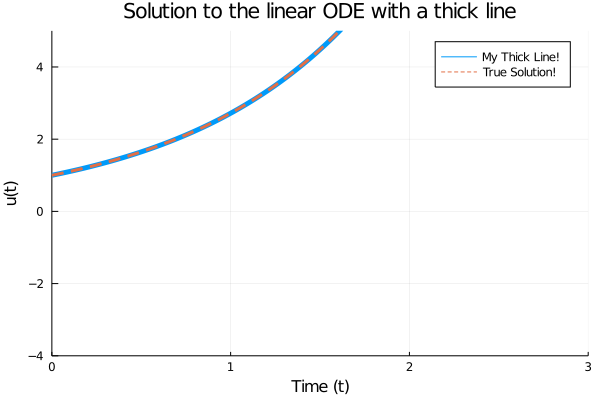

In [24]:
plot(sol, lw=5, title = "Solution to the linear ODE with a thick line",xaxis="Time (t)", yaxis="u(t)", label="My Thick Line!")
plot!(sol.t, t -> x₀*exp(k*t), lw=3, ls=:dash, label="True Solution!", ylim=(-4,5))

In [4]:
for k = -3:.1:1, x₀ = -3:.1:3
    f(x, p, t) = k*x # + .01 * sin(x)
    
    tₛₚₐₙ = (0.0, 3.0)
    prob = ODEProblem(f, x₀, tₛₚₐₙ)
    sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
    
    plot(sol, linewidth=5, title = "Solution to the linear ODE with a thick line", xaxis="Time (t)", yaxis="u(t)", label="My Thick Line!")
    plot!(sol.t, t -> x₀ * exp(k*t), lw=:dash, label="True Solution!", ylim=(-4,5))
end

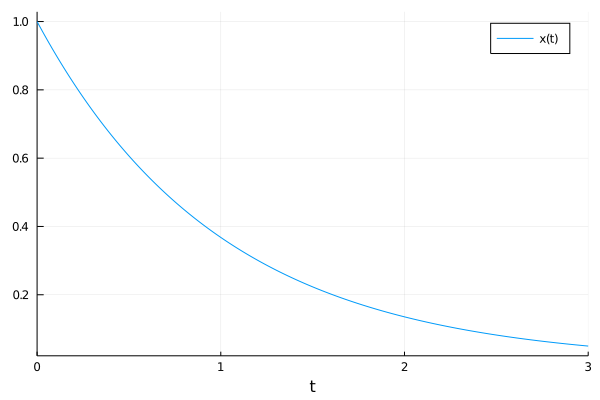

In [5]:
k = 1.0

@parameters t,ç
@variables x(t)
@derivatives D'~t

eqs = [D(x) ~ -k*x]  # x' = -kx
sys = ODESystem(eqs)

x₀ = [x => 1.0]
p = [k => 1.0]
tₛₚₐₙ = (0.0, 3.0)
prob = ODEProblem(sys, x₀, tₛₚₐₙ, p)
sol = solve(prob, Tsit5())

plot(sol)

# SIR Model

$$\frac{dS}{dt} = - \frac{\beta I S}{N}$$  
$$\frac{d I }{dt} = \frac{\beta I S}{N} - \gamma I $$  
$$\frac{d R}{dt} = \gamma I $$

where:
- $S$ is the stock of susceptible population, 
- $I$ is the stock of infected,
- $R$ is the stock of removed population (either by death or recovery)
- $\beta$ is the number of people you meet & can infect you
- $\frac{S}{N}$ is the probability of a person you meet being susceptible
- $\gamma$ is the rate of recovery

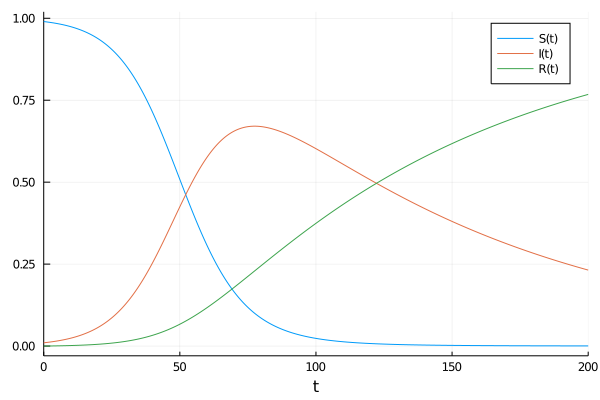

In [8]:
using ModelingToolkit, DifferentialEquations

@parameters t β γ
@variables S(t) I(t) R(t)
@derivatives D'~t

eqs = [D(S) ~ -β*S*I,
    D(I) ~ β*S*I - γ*I,
    D(R) ~ γ*I]
sys = ODESystem(eqs)

u₀ = [S => 0.99,
    I => 0.01,
    R => 0.0]
p = [β => 0.1,
    γ => 0.01]
tₛₚₐₙ = (0.0, 200.0)
prob = ODEProblem(sys, u₀, tₛₚₐₙ, p)
sol = solve(prob, Tsit5())
using Plots; plot(sol)